# Prosper Loan Data Exploration
## by Dayane Sallet

## Investigation Overview

Along this investigation, I wanted to understand what variables would have some influence the loan's status. Among all the provided variables, there were a smaller number which were initially considered to have some relation with the loan status, such  that it was expected that completed and current status are linked with a smaller number of terms, a lower borrower rate, a positive employment status, homeownership, no delinquencies, a small debt to income ratio, high income range and monthly income.
 

## Dataset Overview

The data is structured in 113,937 loan entries in which each entry has 81 different variables. These variables are mostly numeric, however there are some categorical variables. 

Numeric variables are mainly values indicating total loan amount, yield, payment rates and overall rates. On the other hand, categorical variables indicate dates and characteristics of the borrowers.

During the analysis, were considered only 20 variables and some loan entries were not considered, as they presented some values that could possibly be outliers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [57]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('Prosper_loan_clean.csv')
df.head()

,Term,LoanStatus,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
0,36,Completed,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,Other,Self-employed,True,2.0,472.0,4.0,0.17,"$25,000-49,999",3083.333333,9425,330.43
1,36,Current,0.0920,0.0820,0.07960,0.0249,0.05470,A,7.0,Professional,Employed,False,0.0,0.0,0.0,0.18,"$50,000-74,999",6125.000000,10000,318.93
2,36,Completed,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,Other,Not available,False,1.0,NaN,0.0,0.06,Not displayed,2083.333333,3001,123.32
3,36,Current,0.0974,0.0874,0.08490,0.0249,0.06000,A,9.0,Skilled Labor,Employed,True,4.0,10056.0,14.0,0.15,"$25,000-49,999",2875.000000,10000,321.45
4,36,Current,0.2085,0.1985,0.18316,0.0925,0.09066,D,4.0,Executive,Employed,True,0.0,0.0,0.0,0.26,"$100,000+",9583.333333,15000,563.97


In [59]:
income_range = ['Not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                '$75,000-99,999', '$100,000+']
income_ranges = pd.api.types.CategoricalDtype(ordered = True, categories = income_range)
df['IncomeRange'] = df['IncomeRange'].astype(income_ranges)

# Convert IncomeRange into ordered categorical type
prosper_rate = ['N/A','HR','E','D','C', 'B', 'A', 'AA']
prosper_rates = pd.api.types.CategoricalDtype(ordered = True, categories = prosper_rate)
df['ProsperRating'] = df['ProsperRating'].astype(prosper_rates)

#Adjust datatype for all other categorical columns
df['LoanStatus'] = df['LoanStatus'].astype('category')
df['ProsperScore'] = df['ProsperScore'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['EmploymentStatus'] = df['EmploymentStatus'].astype('category')

## Distribution of loan status

The loan status distribution reveals that the majority of loans are current. This value is follwoed by completed,  charged-off and defaulted loans.

Loans that are defaulted and charged off will be directly linked to "bad payers". This is so because loans in "default" are those in which borrower is not paying for an extended period of time and loans "charged off" are no longer expected to be payed. [1]

[1] https://help.lendingclub.com/hc/en-us/articles/216127747-What-is-the-difference-between-a-loan-that-is-in-default-and-a-loan-that-has-been-charged-off-

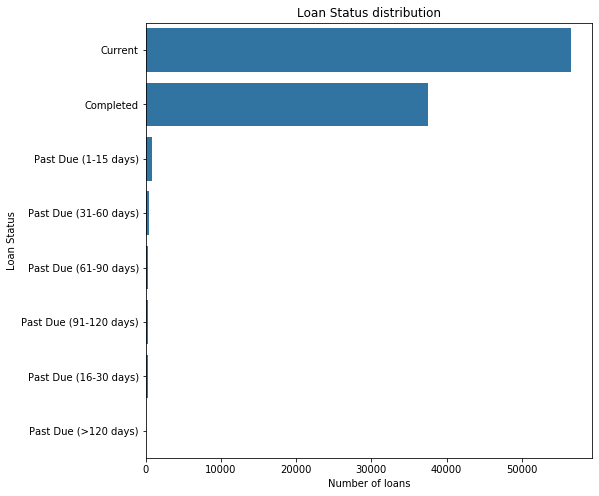

In [60]:
fig, ax = plt.subplots(figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'LoanStatus', color = default_color,  order = df['LoanStatus'].value_counts().index)
plt.ylabel('Loan Status')
plt.xlabel('Number of loans')
plt.title('Loan Status distribution')
plt.show()

##  Distribution of debt to income ratio

The debt to income ratio is right-skewed and it indicates that the majority of borrowers have a debt that is smaller than their income.

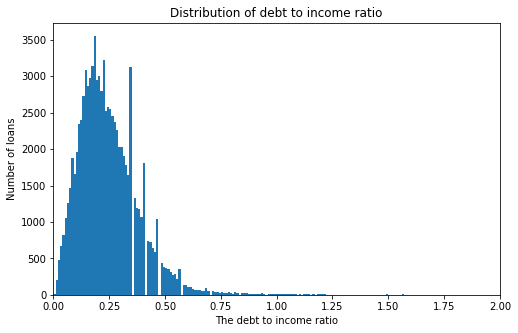

In [61]:
bins = np.arange(0, df['DebtToIncomeRatio'].max()+0.01, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'DebtToIncomeRatio', bins =bins)
plt.xlabel('The debt to income ratio')
plt.xlim(0,2)
plt.ylabel('Number of loans')
plt.title('Distribution of debt to income ratio')
plt.show()

## Distribution of income range
Most of borrowers earn between more than 25,000, and most of borrowers earn in range between 25,000 and 49,999.

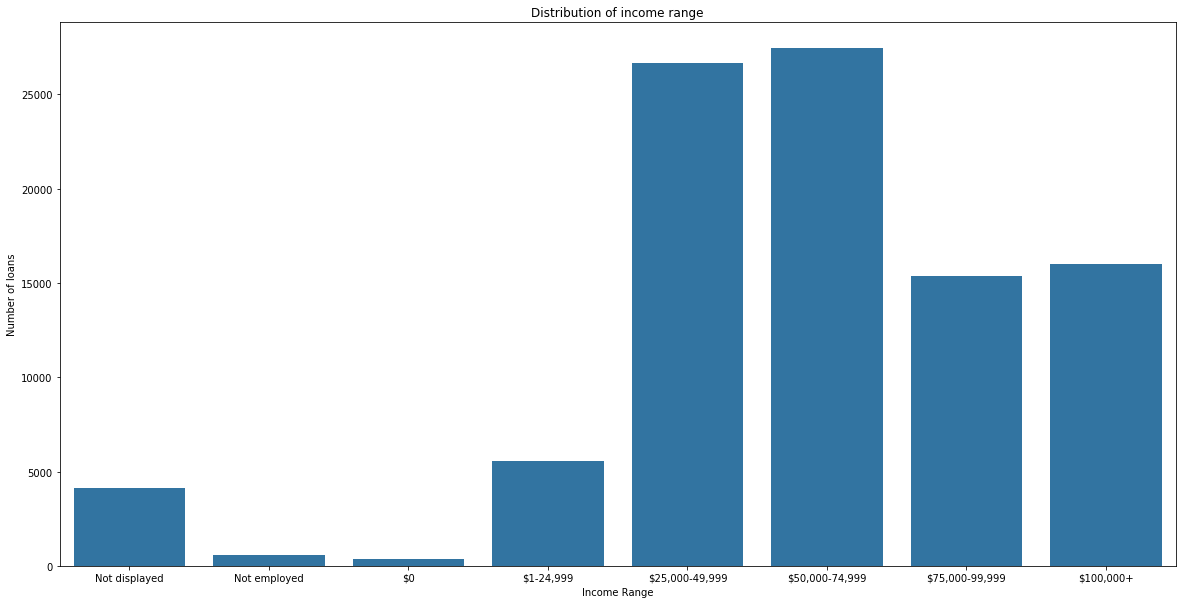

In [62]:
fig, ax = plt.subplots(figsize = [20,10])
default_color = sb.color_palette()[0]
sb.countplot(data = df, x = 'IncomeRange', color = default_color)
plt.xlabel('Income Range')
plt.ylabel('Number of loans')
plt.title('Distribution of income range')
plt.show()

## Distribution of Stated Monthly Income ,  Monthly Loan Payment and Loan Original Amount

The Stated Monthly Income distribution looks like a normal distribution, the Monthly Loan Payment distribution looks a little bimodal and there are  some peaks of values in the Loan Original Amount distribution around 4,000, 10,000 and 15,000.

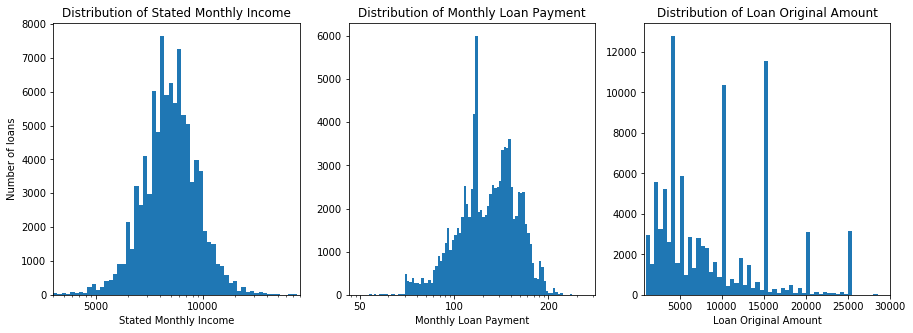

In [63]:
fig, ax = plt.subplots(ncols = 3, nrows = 1 , figsize = [15,5])

x_ticks = [500, 1000, 5000, 10000, 50000, 100000]
log_binsize = 0.04
bins = 10 ** np.arange(1, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)
ax[0].hist(data = df, x = 'StatedMonthlyIncome', bins =bins)
ax[0].set_xlabel('Stated Monthly Income')
ax[0].set_ylabel('Number of loans')
ax[0].set_xscale('log')
ax[0].set_xticklabels(x_ticks)
ax[0].set_xlim(400,80000)
ax[0].set_title('Distribution of Stated Monthly Income')

x_ticks = [10, 20, 50, 100, 200, 500, 1000, 2000]
log_binsize = 0.025
bins = 10 ** np.arange(1, np.log10(df['MonthlyLoanPayment'].max())+log_binsize, log_binsize)
ax[1].hist(data = df, x = 'MonthlyLoanPayment', bins =bins)
ax[1].set_xlabel('Monthly Loan Payment')
ax[1].set_xscale('log')
ax[1].set_xticklabels(x_ticks)
ax[1].set_title('Distribution of Monthly Loan Payment')

x_ticks = [1000, 2000,4000, 10000,15000,20000]
bins = np.arange(0, df['LoanOriginalAmount'].max()+500, 500)
ax[2].hist(data = df, x = 'LoanOriginalAmount', bins =bins)
ax[2].set_xlabel('Loan Original Amount')
ax[2].set_xlim(800,30000)
ax[2].set_title('Distribution of Loan Original Amount')

plt.show();


##  Loan Status vs. Borrower Rate
It is possible to notice that current loans have a range of rates between 0.05 and 0.35. Past due loans seem to have a higher rate, with values closer to 0.2 and 0.3.

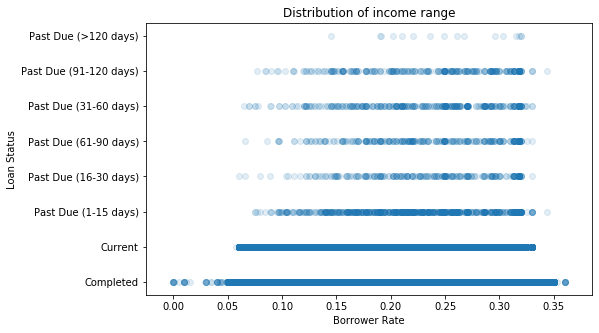

In [65]:
plt.figure(figsize=[8, 5])
plt.scatter(data = df, x = 'BorrowerRate', y = 'LoanStatus', alpha = 1/8)
plt.ylabel('Loan Status')
plt.xlabel('Borrower Rate')
plt.title('Distribution of income range');

## LoanStatus vs. IncomeRange
The majority of current loans are made by individual with an income range of 50,000 – 75,999. But if it is regarded the past due loans, most are made by individual with an income range between 25,000 - 49,999.

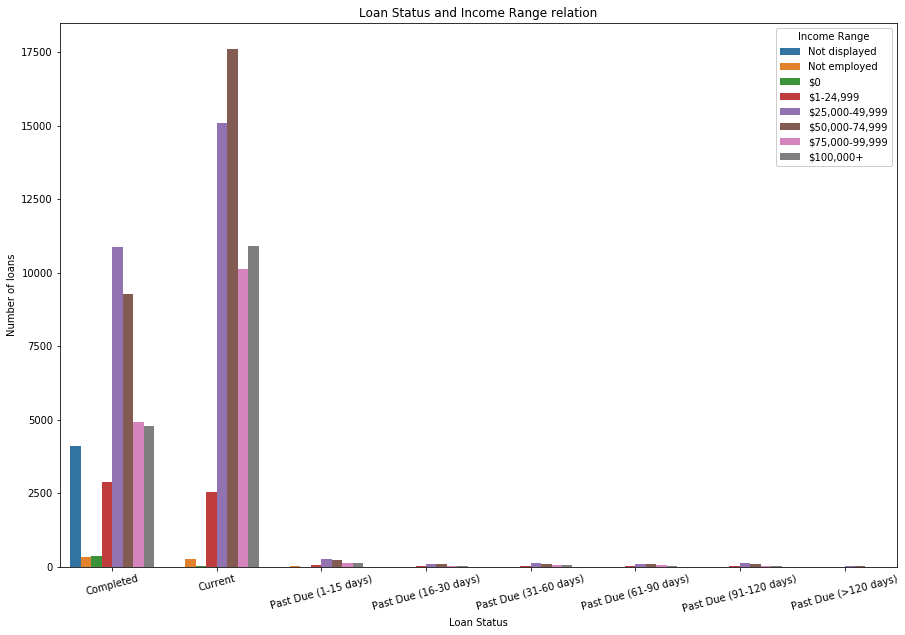

In [70]:
plt.figure(figsize=(15,10))
sb.countplot(data = df, x = 'LoanStatus', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.xticks(rotation=15)
plt.ylabel('Number of loans')
plt.legend(framealpha = 1, title = 'Income Range', loc = 1)
plt.title('Loan Status and Income Range relation')
plt.show();

## LoanStatus vs. Loan Original Amount and Monthly Loan Payment
    • Past due loans have a high frequency in amount around 4,000, 10,000 and 15,000.
    • Past due loans have a high frequency of occurrences in values around monthly loan payments of 200.
    Past due loans have monthly payments around 200 and they present higher borrowers rates.

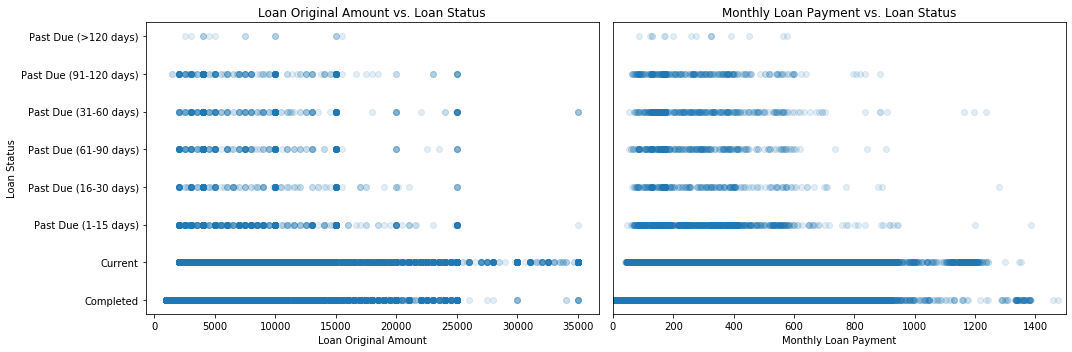

In [76]:
fig, ax = plt.subplots(ncols = 2, nrows = 1 , figsize = [15,5])

ax[0].scatter(data = df, x = 'LoanOriginalAmount', y = 'LoanStatus', alpha = 1/8)
ax[0].set_ylabel('Loan Status')
ax[0].set_xlabel('Loan Original Amount')
ax[0].set_title('Loan Original Amount vs. Loan Status')

ax[1].scatter(data = df, x = 'MonthlyLoanPayment', y = 'LoanStatus', alpha = 1/8)
ax[1].set_xlabel('Monthly Loan Payment')
ax[1].set_yticks([])
ax[1].set_xlim(0,1500)
ax[1].set_title('Monthly Loan Payment vs. Loan Status')

fig.tight_layout()
plt.show();

## CurrentDelinquencies vs. EmploymentStatus
majority people with 0 delinquencies are those employed, full-time and self-employed.

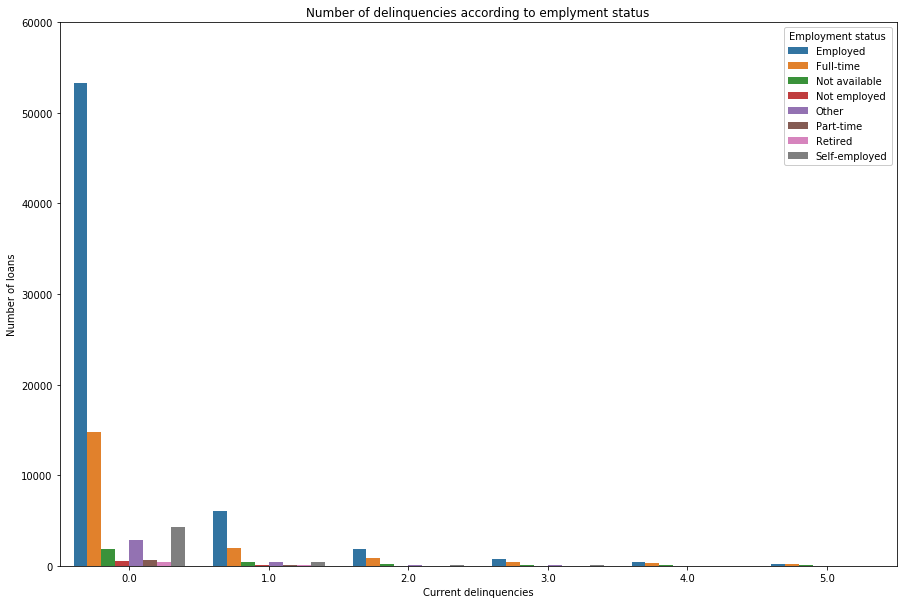

In [80]:
plt.figure(figsize=(15,10))
sb.countplot(data = df, x = 'CurrentDelinquencies', hue = 'EmploymentStatus')
plt.xlabel('Current delinquencies')
plt.ylabel('Number of loans')
plt.legend(framealpha = 1, title = 'Employment status')
plt.xlim(-0.5,5.5)
plt.ylim(0,60000)
plt.title('Number of delinquencies according to emplyment status')
plt.show();

## CurrentDelinquencies vs. IsBorrowerHomeowner
homeownership has no influence on wether someone will pay or not the loan

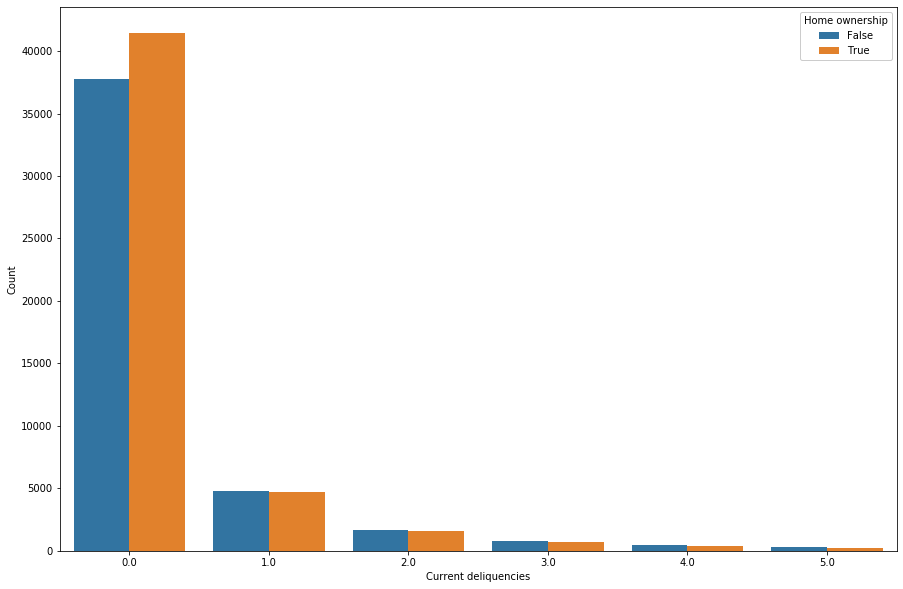

In [79]:
plt.figure(figsize=(15,10))
sb.countplot(data = df, x = 'CurrentDelinquencies', hue = 'IsBorrowerHomeowner')
plt.xlabel('Current deliquencies')
plt.ylabel('Number of loans')
plt.legend(framealpha = 1, title = 'Homeownership')
plt.xlim(-0.5,5.5)
plt.title('Number of delinquencies according to homeownership')
plt.show();

## StatedMonthlyIncome vs. AmountDelinquent
In the previous plot we can observe again that those individuals with smaller income are the ones with a higher amount delinquent.

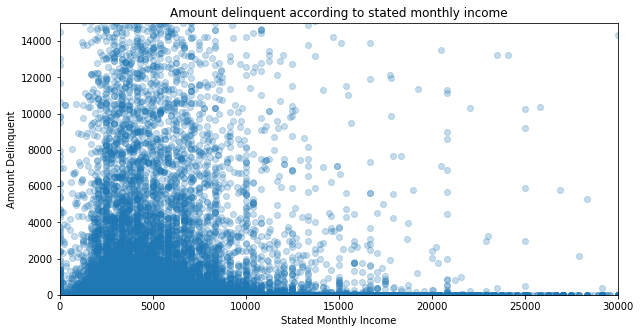

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(data = df, x = 'StatedMonthlyIncome', y = 'AmountDelinquent', alpha = 1/4)
plt.ylabel('Amount Delinquent')
plt.xlabel('Stated Monthly Income')
plt.xlim(0,30000)
plt.ylim(0,15000)
plt.title('Amount delinquent according to stated monthly income')
plt.show();

## StatedMonthlyIncome vs. DebtToIncomeRatio
It is possible to notice a negative trend between debt to income ratio and stated monthly income. This means that people with higher income usually have a loan value that is less significant when compared to their total income.

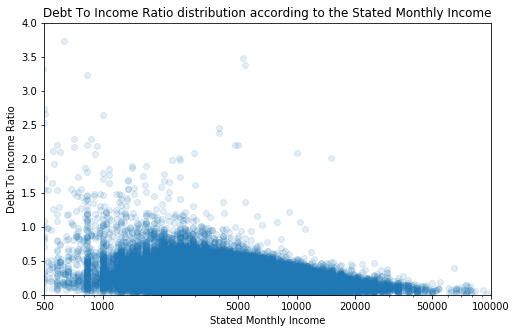

In [84]:
x_ticks = [500, 1000, 5000, 10000,20000, 50000,100000]
plt.figure(figsize=[8, 5])
plt.scatter(data = df, x = 'StatedMonthlyIncome', y = 'DebtToIncomeRatio',  alpha = 1/8)
plt.xlabel('Stated Monthly Income')
plt.ylabel('Debt To Income Ratio')
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.xlim(500,100000)
plt.ylim(0,4)
plt.title('Debt To Income Ratio distribution according to the Stated Monthly Income')
plt.show();

## Understand the relation between LoanStatus, MonthlyLoanPayment and BorrowerRate
It is possible to notice that for current and completed loans there s an increasing trend between borrower rate and monthly loan payment. This trend can be observed in past due loans, however it is less intense. Also, it is possible to notice that past due loans usually have lower monthly loan payments and rates around 0.3.

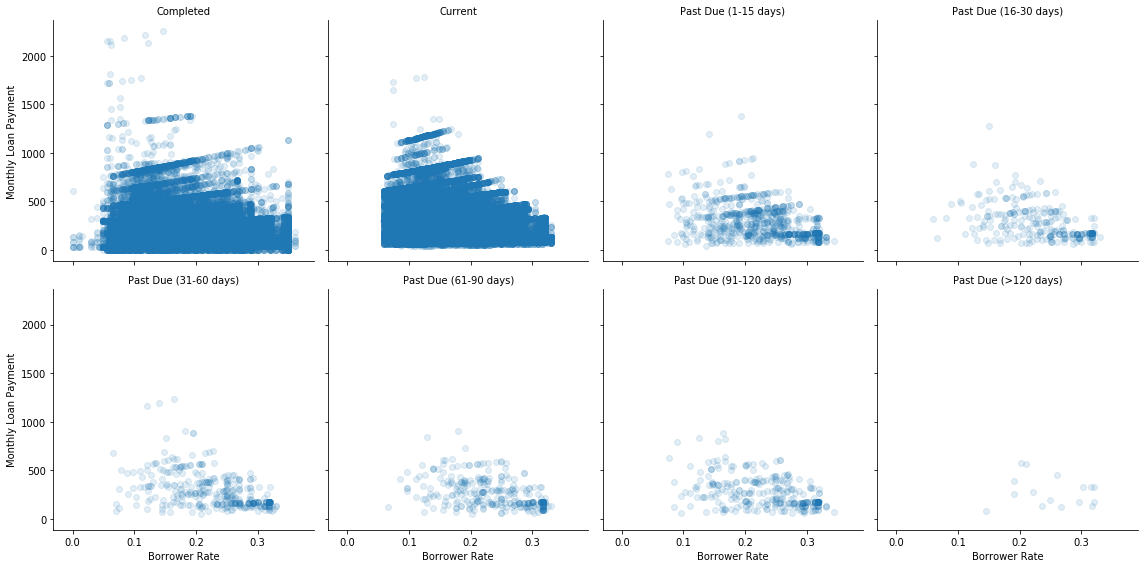

In [85]:
g = sb.FacetGrid(data = df, col = 'LoanStatus', size = 4, col_wrap = 4)
g.map(plt.scatter, 'BorrowerRate','MonthlyLoanPayment', alpha = 1/8)
g.set_ylabels('Monthly Loan Payment')
g.set_xlabels('Borrower Rate')
g.set_titles('{col_name}');

## Understand the relation between LoanStatus, MonthlyLoanPayment and LoanOriginalAmount
As expected, higher loan original amounts have higher monthly payments. Another noticeable fact is that past due loans have lower loan original amount values.

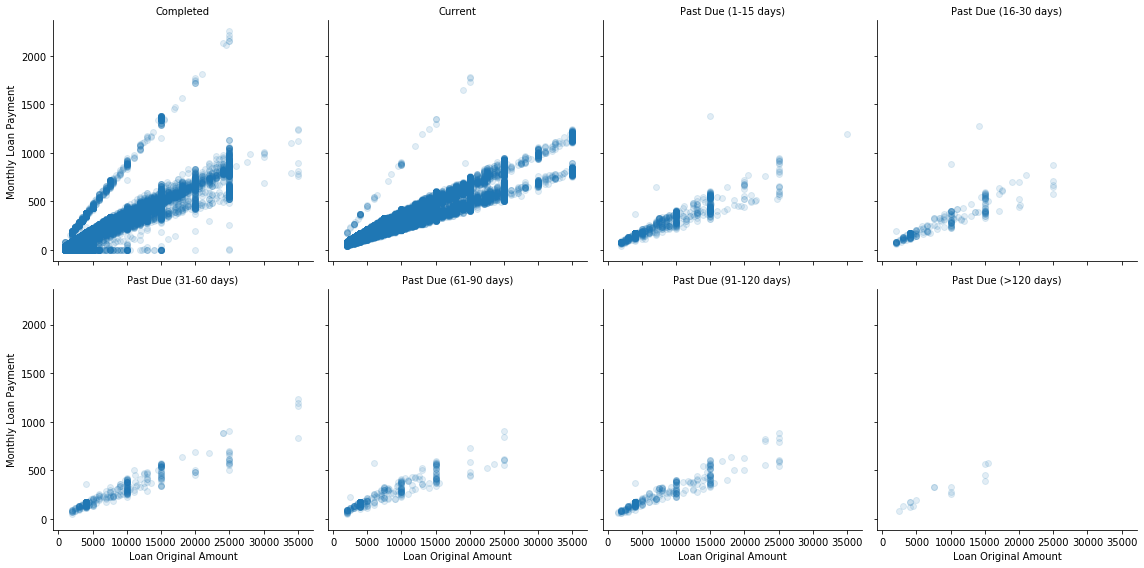

In [86]:
g = sb.FacetGrid(data = df, col = 'LoanStatus', size = 4, col_wrap = 4)
g.map(plt.scatter, 'LoanOriginalAmount','MonthlyLoanPayment', alpha = 1/8)
g.set_xlabels('Loan Original Amount')
g.set_ylabels('Monthly Loan Payment')
g.set_titles('{col_name}');


## Understand the relation between LoanStatus, IncomeRange and LoanOriginalAmount
It is verified an increasing trend in the median of loan original amounts as the income range increases. This pattern can be observed in most loans status.

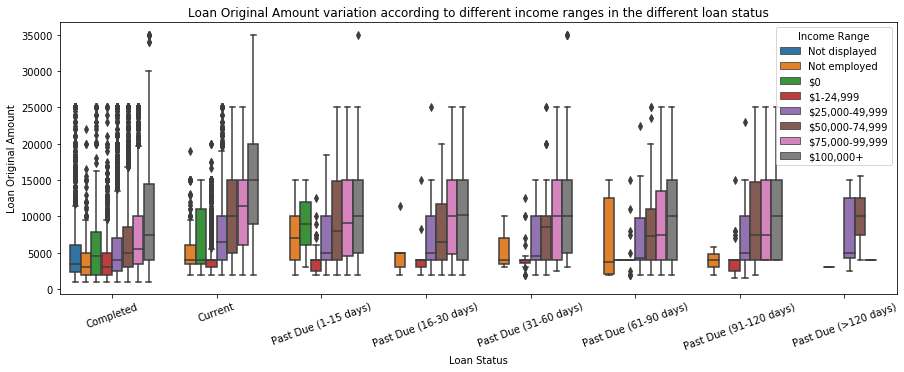

In [102]:
plt.figure(figsize=[15,5])
sb.boxplot(data = df, x = 'LoanStatus', y = 'LoanOriginalAmount', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=20)
plt.legend(title = 'Income Range',  bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Loan Original Amount variation according to different income ranges in the different loan status')
plt.show();


## Understand the relation between LoanStatus, BorrowerRate and IncomeRange
It is verified a decreasing trend in the borrower rate as the income range increases. We can also observe higher median borrower rates for past due loans and that this rate is higher for the income range 1-24,999 with loans past due over 60 days.

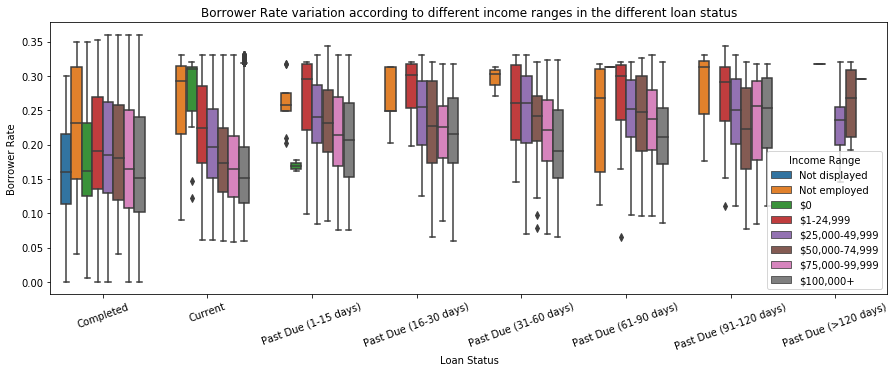

In [106]:
plt.figure(figsize=[15,5])
sb.boxplot(data = df, x = 'LoanStatus', y = 'BorrowerRate', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.ylabel('Borrower Rate')
plt.xticks(rotation=20)
plt.legend(title = 'Income Range',  bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Borrower Rate variation according to different income ranges in the different loan status')
plt.show();

## Understand the relation between LoanStatus, MonthlyLoanPayment and IncomeRange
It is verified an increasing trend in the median monthly loan payment for increasing income ranges. It is also possible to verify that past due loans have lower monthly loan payments.


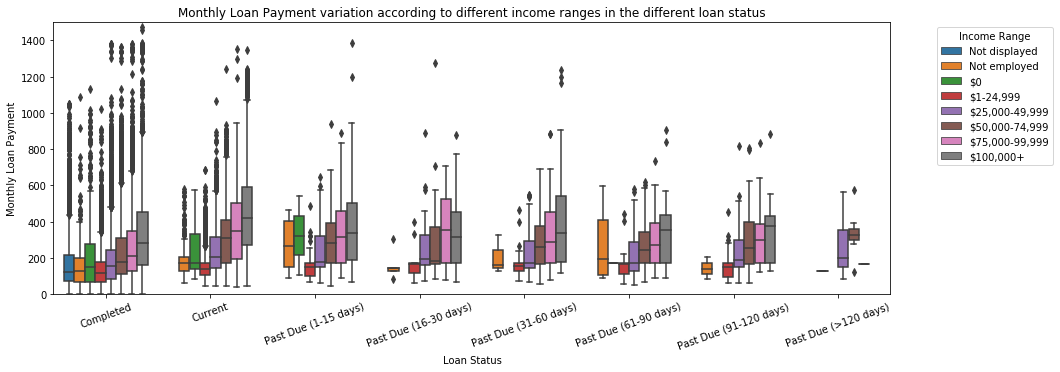

In [113]:
plt.figure(figsize=[15,5])
sb.boxplot(data = df, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'IncomeRange')
plt.xlabel('Loan Status')
plt.ylabel('Monthly Loan Payment')
plt.xticks(rotation=20)
plt.ylim(0,1500)
plt.legend(title = 'Income Range',  bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Monthly Loan Payment variation according to different income ranges in the different loan status')
plt.show();

## Monthly Loan Payments across Income Ranges and Loan Status

Again, it is verified an increasing central tendency between the monthly loan payments and higher income ranges. It is also noticeable a high variability in the monthly payment for past due loans.

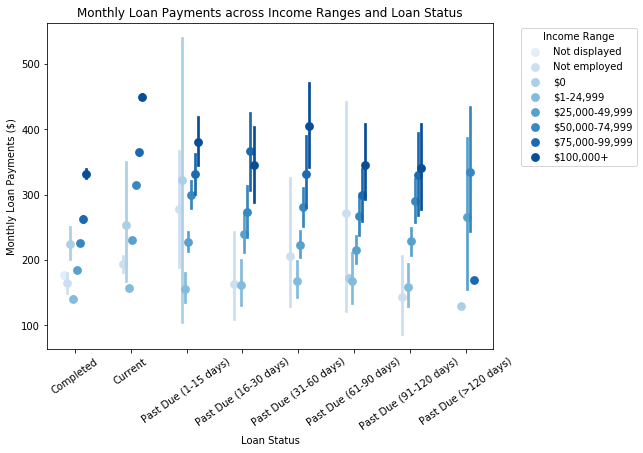

In [112]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'LoanStatus', y = 'MonthlyLoanPayment', hue = 'IncomeRange',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Monthly Loan Payments across Income Ranges and Loan Status')
plt.ylabel('Monthly Loan Payments ($)')
plt.xlabel('Loan Status')
plt.xticks(rotation=35)
plt.legend(title = 'Income Range', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show();

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!